# Build Machine Learning Regression Model for Boston Dataset

For the following analysis, we are going to walktrough to Boston dataset obtained from this [website](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Before deep dive into the dataset, let's understand what description in each feature of data

There are 14 attributes in each case of the dataset. They are:
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10000 in dollar
- PTRATIO : pupil-teacher ratio by town
- BLACK : is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in $1000's

In this analysis, we are going to predict MEDV feature for which become our target variable

### Note from dataset
- Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000); Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

## Table of Content

What we're going to cover in this notebook? 

1. Data Exploration in general by visualize the data using `seaborn` library
2. Data cleaning -> calculate how much ourliers in the data, and take action to dealing with those outliers
3. Build machine learning model : there are three model to build, LinearRegression, Ridge, and Lasso. We are going to `import` those function from `sklearn` library
4. Check whether our model fit into regression assumption by plotting **residual** vs **predictor** and visualize their **QQplot**
5. In the end, let us understand how better each model by calculate the **R2 score**, **RMSE**, **MAE**, **MAPE**

### Note
- RMSE : Root Mean Squared Error
- MAE : Mean Absolute Error
- MAPE : Mean Absolute Percetage Error

In [1]:
#Importing the necessary libraries to use
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')

/var/folders/hm/4gy529yx1ts3knwwpl0wm7bm0000gn/T/ipykernel_4776/4254556568.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import the dataset and view the first 5 data 
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Check general info of the dataset 
# We can know the type of the data and the missing value/ NULL value
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


From the info, there is no missing value / NULL value, and the type are numeric
so we don't have to deal with missing value

Since computer are good computing numeric data, so we don't have to alter any type of the data. 

In [4]:
# Lets get the general properties of each features
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

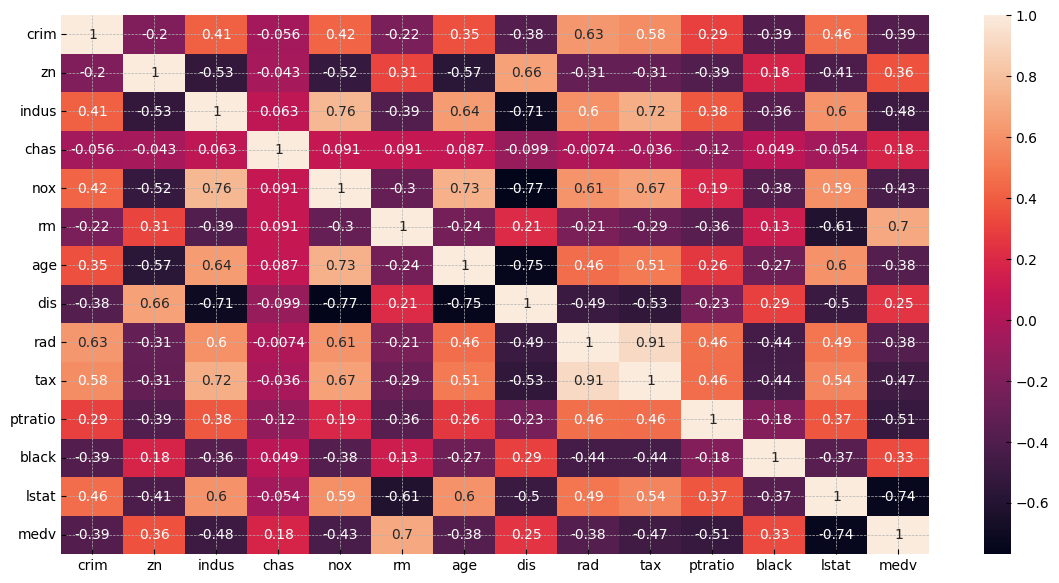

In [5]:
# check the correlation between each feature
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only = True),cbar=True,annot=True)

According to the correlation matrix, we see that there are some positive and negative correlation from our features towards our target variable (MEDV)

| Feature | Correlation Value |
| ----------- | ----------- |
| ZN | 0.36 |
| CHAS | 0.16 |
| RM | 0.7 |
| DIS | 0.25 |
| BLACK | 0.33 |
| CHRIM | -0.39 |
| INDUS | -0.48 |
| NOX | -0.43 |
| AGE | -0.38 |
| RAD | -0.38 |
| TAX | -0.47 |
| PTRATIO | -0.51 |
| LSTAT | -0.74 |

Also, there are another interesting insight from the correlation matrix. We found several independent variable which *correlate* with another independent variable. Let's set the threshold >= 0.7 have a high correlation. 

| Feature - Feature | Correlation Value | 
| ----------------- | ----------------- |
| RAD - TAX | 0.91 |
| DIS - NOX | 0.77 |
| NOX - INDUS | 0.76 | 
| DIS - AGE | 0.75 |
| NOX - AGE | 0.73 |
| TAX - INDUS | 0.72 |
| DIS - INDUS | 0.71 |

The one for which concerning is correlation between RAD and TAX, they are too correlated to each other although they are an independent variable. This is not good, since it can affect our model later on. However, the decision to whether we drop one of those columns is from the calculation using **VIF score** later in. 

## Outliers Detection

After check the correlation between each feature, I like to detect outliers. This is important step since outlier can affect our model score later. `Boxplot` is a great visualization to display the outliers

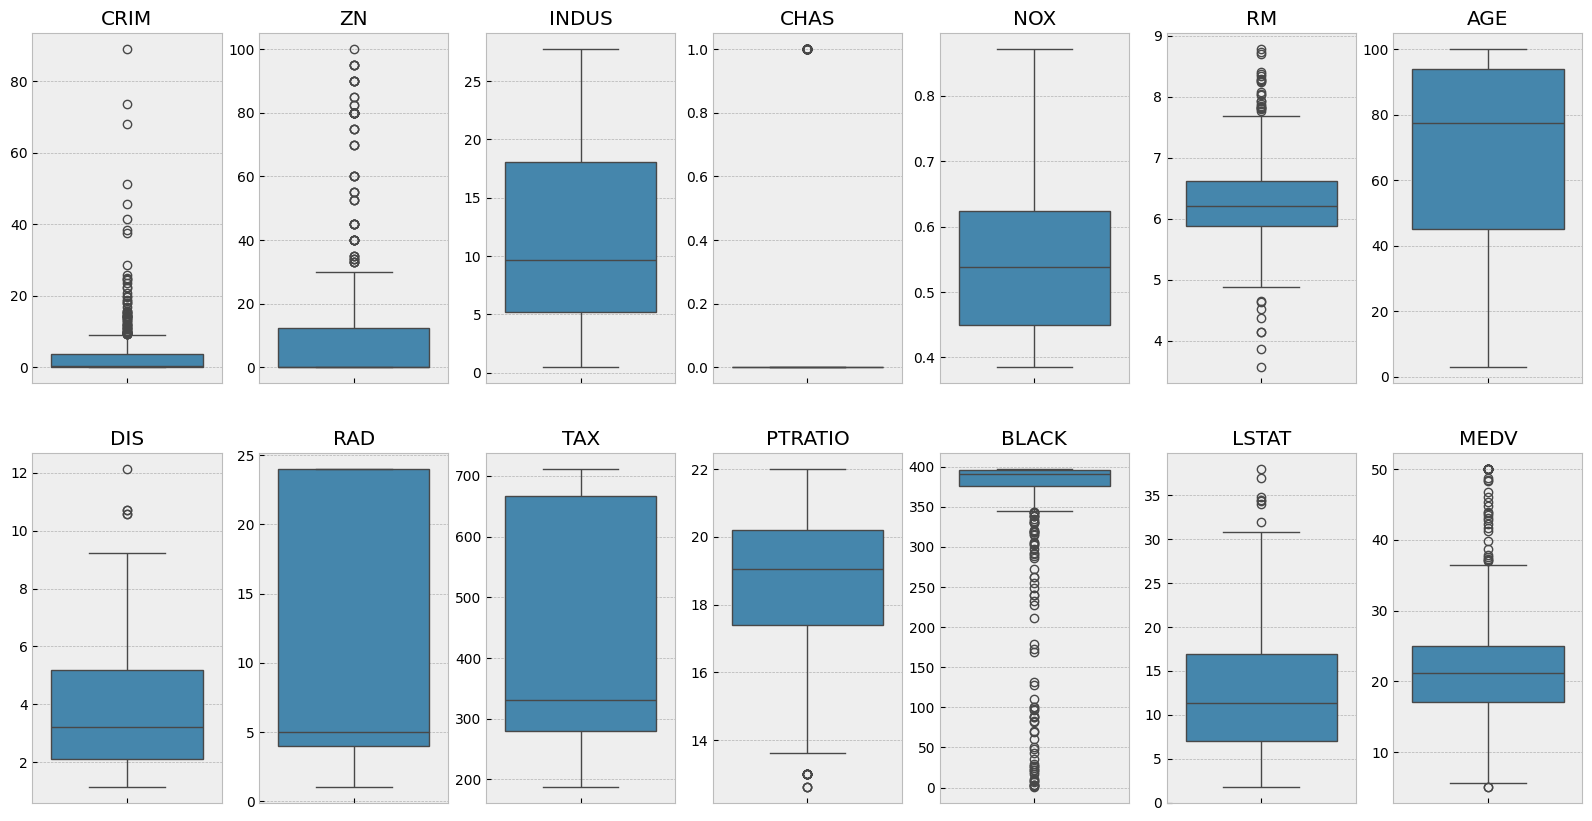

In [6]:
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df, y=df.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df.columns[index].upper())

It seems from the plots, CRIM, ZN, RM, DIS, PTRATIO, BLACK, LSTAT, and MEDV have a lot of outliers. The question is, how many *a lot* means?

So, let's calculate how many outliers we have in our dataset for each feature by calculating its percentage

In [7]:
outliers_list = []

for col in df.columns:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    
    IQR  = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR
    
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    percentage = outliers.shape[0] / df.shape[0] * 100

    outlier_dict = {'Feature' : col.upper(),
                    'Outlier Percentage' : f'{percentage:.2f}' + '%'}
    
    outliers_list.append(outlier_dict)

# display it using dataframe for better reading
outlier_df = pd.DataFrame(outliers_list)
outlier_df

,Feature,Outlier Percentage
0,CRIM,13.04%
1,ZN,13.44%
2,INDUS,0.00%
3,CHAS,6.92%
4,NOX,0.00%
5,RM,5.93%
6,AGE,0.00%
7,DIS,0.99%
8,RAD,0.00%
9,TAX,0.00%


Features with outlier > 5% are concerning. The outliers are too much. This outliers can be caused by many error, it can be measurement error, wrong data collection, or wrong data entry. However, not all the outliers bad. Deleting all the outlier outside the `upper_limit` and `lower_limit` of **interquantile calculation*** above is not a good option either, since it can reduce our dimesion too much. The model might find it hard to learn if we have small dimension. So we just need to be a little bit smart how to deal with this outlier.

To deal with this outlier, we should go back to the *note from dataset*, that tell us if the MEDV == 50.00 is censored. Also, I have a suspisious in this note. So, let us remove all the data in ourdataframe of MEDV == 50.00

In [8]:
# remove outliers if medv == 50.00
df = df[~(df['medv'] == 50.0)]

## Hist and RegScatter Plot

So, we have managed our outliers. But, I feel I haven't familiarize with the data yet. To get better understand our data, let us display the data with another visualization technique which are `Histogram` and `Regression-Scatter` Plot. 

Histogram is great to know the frequency of each data, and get sense whether our data are normally distributed or skewed to the right/left.
Regression-Scatter plot is great to understand the linearity relationship between our independent variable (feature) to our target variable

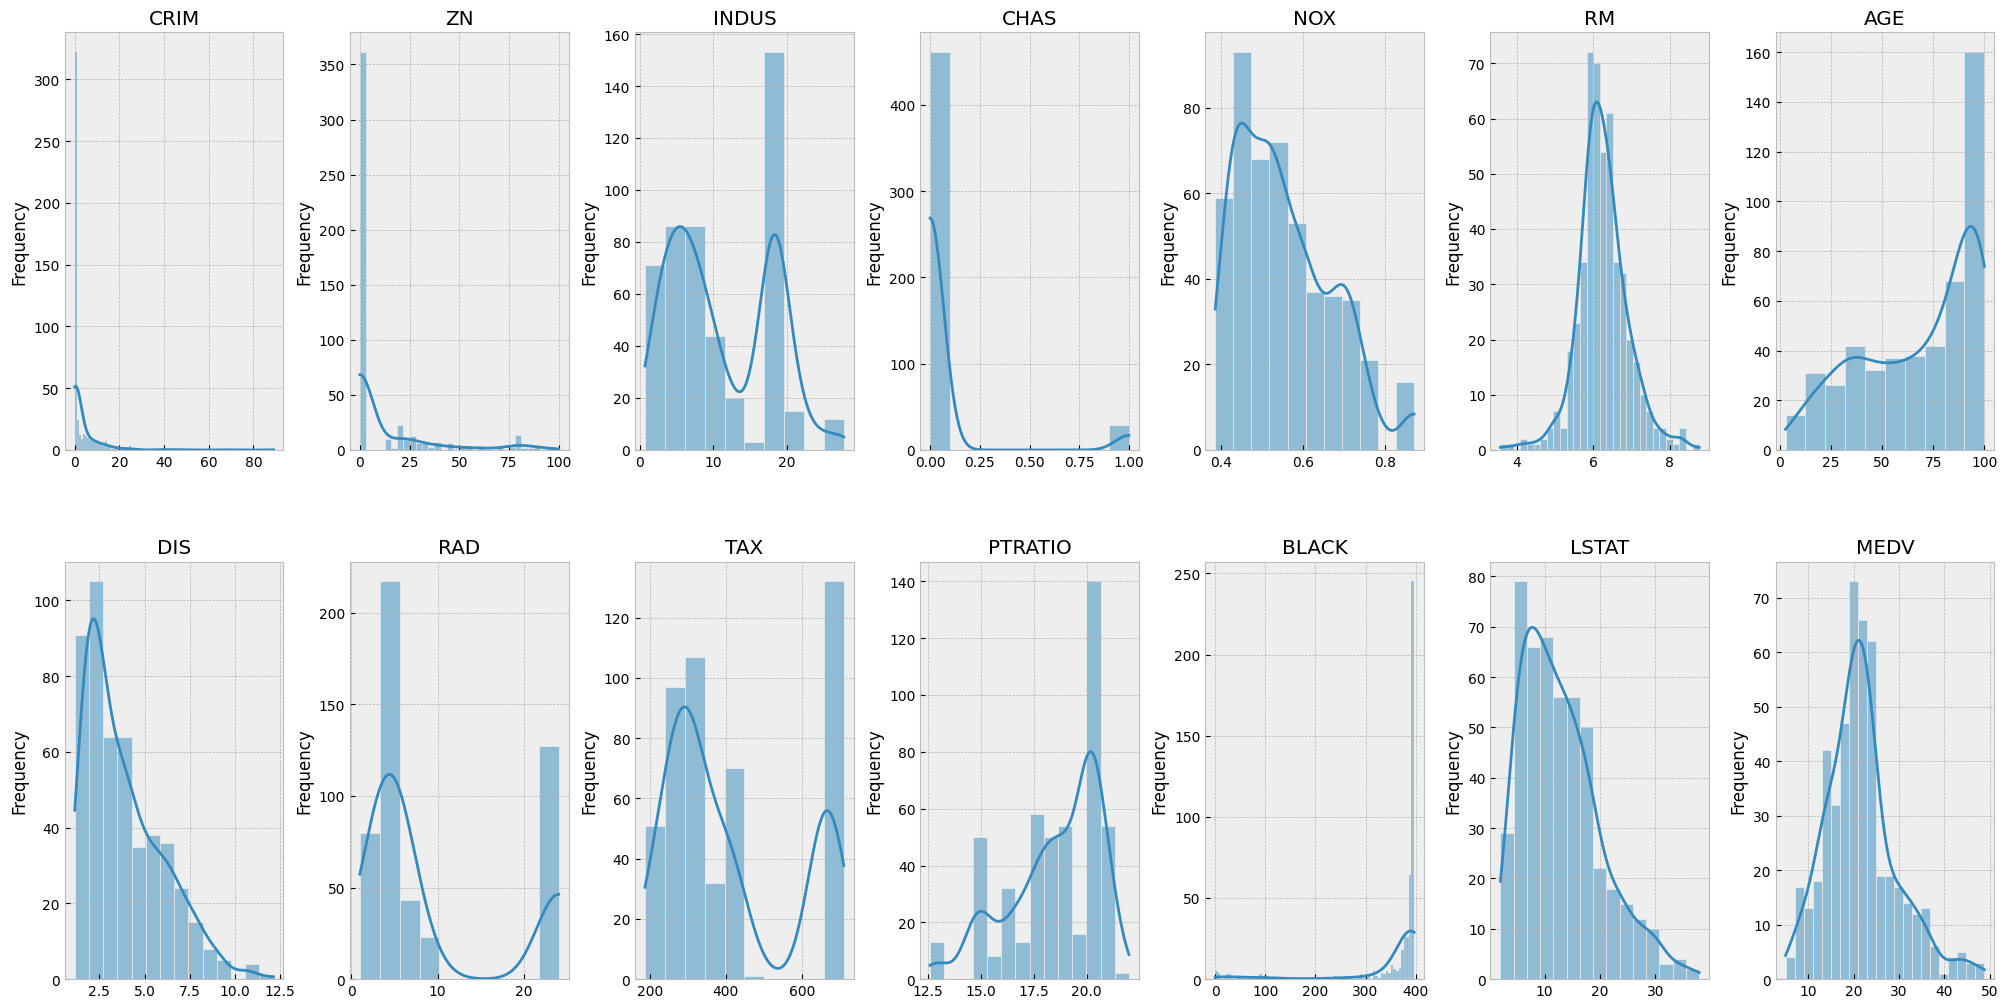

In [9]:
# we plot using seaborn for histplot
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df, x=df.columns[index], kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df.columns[index].upper())
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

As we can see on the graph above, the feature which normally distributed is only RM. Column MEDV is a litlle bit skewed to the left, but show a normal distribution properties.

Other features show either they're skewed to the left or to the right

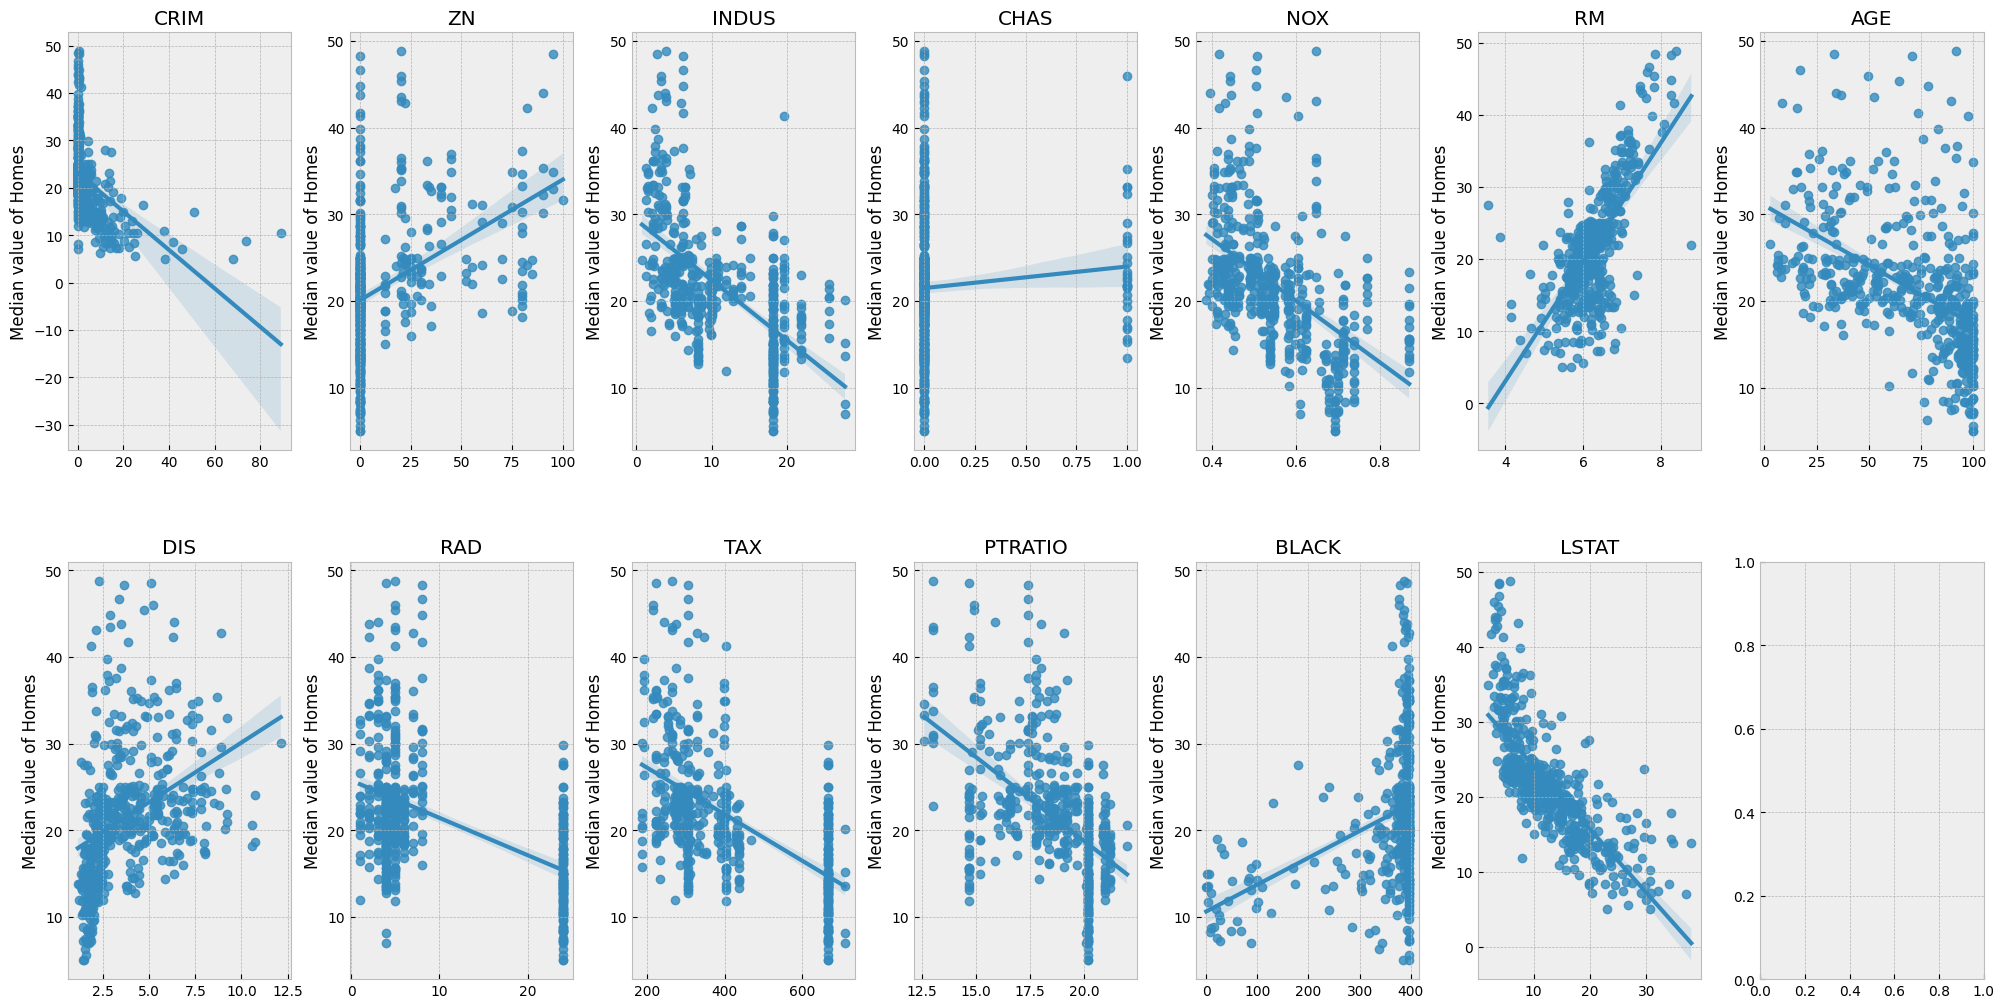

In [10]:
# this plot is for regplot
features_cols = df.columns[:-1]

fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()[:len(features_cols)]):
    plot = sns.regplot(x=features_cols[index], y='medv', data=df, ax=axs)
    plot.set(xlabel='', ylabel='Median value of Homes', title=features_cols[index].upper())
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From Regplot, we obtain some insight. 

1. Feature RM and LSTAT have a high linearity relationship with our target variable. This also showed by high correlation value before, they correlate with +0.7 and -0.74 respectively. This mean RM and LSTAT are very important feature to predict our target value.
2. CHAS seems not good to view it using `Regplot` since the value is only 1.0 and 0.0, a binary value.
3. The other feature, even though are not show high correlation score toward MEDV, but still show us a linearity relationship with our target variable.

## Machine Learning Model 

From this section, we are going to build machine learning regression model. There are three models that will be used. 

1. LinearRegression
2. Ridge
3. Lasso

Import those models from `sklearn` library.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = df.drop(columns='medv')
target = df['medv']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(feature, 
                                                              target,
                                                              test_size = 0.2,
                                                              random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_temp,
                                                  y_train_temp,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [12]:
#Check the shape of the train, test, and validation data 

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 60% from the original data
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print()

# test shape, we take 20% from the original data
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
print()

# validation shape, we take 20% from the original data
print('X_val shape : {}'.format(X_val.shape))
print('y_val shape : {}'.format(y_val.shape))

Feature shape before split : (490, 13)
Target shape before split : (490,)

X_train shape : (313, 13)
y_train shape : (313,)

X_test shape : (98, 13)
y_test shape : (98,)

X_val shape : (79, 13)
y_val shape : (79,)


In [13]:
# Check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], 
                      index = X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,2.079488
2,zn,2.418546
3,indus,3.811354
4,chas,1.049900
5,nox,4.654454
6,rm,1.923483
7,age,3.101301
8,dis,4.071004
9,rad,8.739623
10,tax,10.040523


In [14]:
# Remove tax columns from features data, since the vif score is > 5.

X_train = X_train.drop(columns = 'tax')
X_test = X_test.drop(columns = 'tax')
X_val = X_val.drop(columns = 'tax')

In [15]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

simple_reg = LinearRegression()
simple_reg.fit(X_train_np, y_train_np)

LinearRegression()

In [16]:
# Interpreting the coefficient and intercept
coef_df = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [simple_reg.intercept_] + list(simple_reg.coef_)})
coef_df

,intercept,coefficient
0,intercept,30.725207
1,crim,-0.144286
2,zn,0.036154
3,indus,-0.137137
4,chas,1.407572
5,nox,-10.827174
6,rm,3.264982
7,age,-0.002911
8,dis,-1.273789
9,rad,0.088452


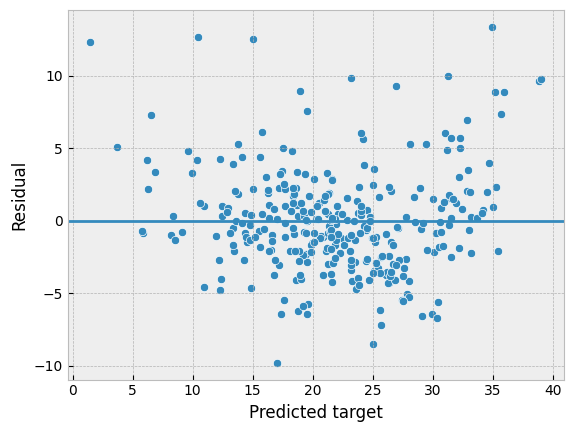

In [17]:
# Calculate residuals
y_predict_train = simple_reg.predict(X_train_np)
residual = y_train_np - y_predict_train

df_resid = pd.DataFrame(
    {'x_axis' : y_predict_train,
     'residual' : residual})

# Residual plot
plot = sns.scatterplot(data = df_resid, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

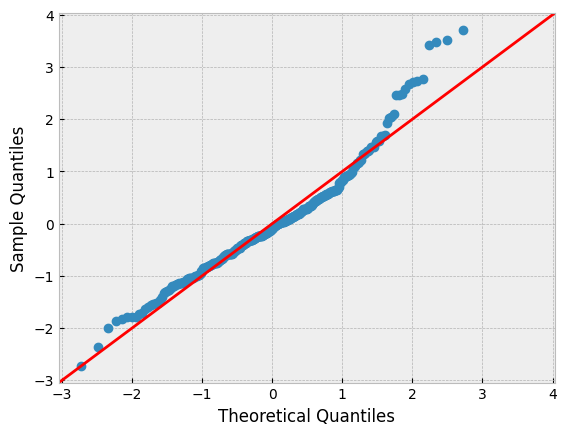

In [18]:
#QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = [X_train.to_numpy(), X_test.to_numpy(), X_val.to_numpy()]
y = [y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy()]
index = ['Training', 'Test', 'Validation']

accuracy_list = []
for i in range(len(X)):
    y_predict = simple_reg.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))

    accuracy = {'Index' : index[i],
                'R_squared' : r2, 
                'RMSE' : rmse}
    
    accuracy_list.append(accuracy)

df_accuracy = pd.DataFrame(accuracy_list)

In [20]:
df_accuracy

,Index,R_squared,RMSE
0,Training,0.784946,3.601027
1,Test,0.723877,3.755774
2,Validation,0.689410,4.884160


## Ridge model calculation

In [21]:
from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = ridge.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 4.885083461253449
RMSE ridge for alpha : 0.1, is 4.892904110036879
RMSE ridge for alpha : 1, is 4.938755708779331
RMSE ridge for alpha : 10, is 5.001789846180206


In [22]:
# Since RMSE calculation from alpha = 10 gives the lowest value, we will use alpha = 10 further in the model

ridge = Ridge(alpha = 0.01, random_state = 42)
ridge.fit(X_train.to_numpy(), y_train.to_numpy())

Ridge(alpha=0.01, random_state=42)

In [23]:
# Interpreting the coefficient and intercept
coef_ridge_df = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [ridge.intercept_] + list(ridge.coef_)})
coef_ridge_df

,intercept,coefficient
0,intercept,30.635658
1,crim,-0.144240
2,zn,0.036142
3,indus,-0.137724
4,chas,1.407211
5,nox,-10.712785
6,rm,3.266636
7,age,-0.003008
8,dis,-1.271726
9,rad,0.088107


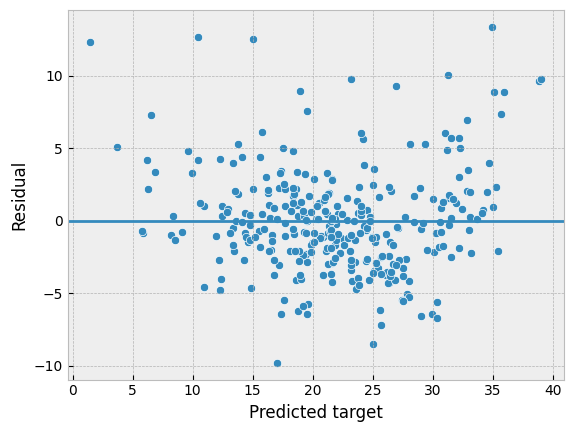

In [24]:
# Check the residual
y_predict_train_ridge = ridge.predict(X_train.to_numpy())

residual_ridge = y_train - y_predict_train_ridge

ridge_residual = pd.DataFrame(
    {'x_axis' : y_predict_train_ridge,
     'residual' : residual_ridge})

# Plot the resiual
plot = sns.scatterplot(data = ridge_residual, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the r2 score and rmse for ridge regression with alpha = 10
accuracy_list_ridge = []
for i in range(len(X)):
    y_predict = ridge.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))
    mae = mean_absolute_error(y[i], y_predict)
    mape = mean_absolute_percentage_error(y[i], y_predict)

    accuracy = {'Index' : index[i],
                'R-squared' : r2,
                'RMSE' : rmse, 
                'MAE' : mae,
                'MAPE' : mape}
    
    accuracy_list_ridge.append(accuracy)

df_accuracy_ridge = pd.DataFrame(accuracy_list_ridge)

In [26]:
df_accuracy_ridge

,Index,R-squared,RMSE,MAE,MAPE
0,Training,0.784946,3.601033,2.658707,0.135738
1,Test,0.723798,3.756310,2.785400,0.166978
2,Validation,0.689293,4.885083,3.497430,0.183893


## Lasso regression

In [27]:
from sklearn.linear_model import Lasso

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = lasso.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE lasso for alpha : 0.01, is 4.905726647428639
RMSE lasso for alpha : 0.1, is 4.944449090306092
RMSE lasso for alpha : 1, is 5.512239255968963
RMSE lasso for alpha : 10, is 6.079962796206132


In [28]:
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_train.to_numpy(), y_train.to_numpy())

Lasso(alpha=0.01, random_state=42)

In [29]:
# Interpreting the coefficient and intercept
coef_lasso = pd.DataFrame(
    {'intercept' : ['intercept'] + X_train.columns.to_list(),
     'coefficient' : [lasso.intercept_] + list(lasso.coef_)})
coef_lasso

,intercept,coefficient
0,intercept,28.182636
1,crim,-0.142744
2,zn,0.035740
3,indus,-0.154254
4,chas,1.238385
5,nox,-7.460609
6,rm,3.293326
7,age,-0.005458
8,dis,-1.209603
9,rad,0.077820


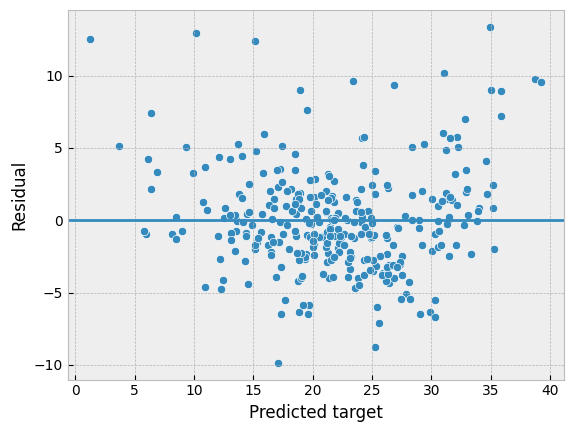

In [30]:
# Check the residual
y_predict_train_lasso = lasso.predict(X_train.to_numpy())

residual_lasso = y_train - y_predict_train_lasso

lasso_residual = pd.DataFrame(
    {'x_axis' : y_predict_train_lasso,
     'residual' : residual_lasso})

# Plot the resiual
plot = sns.scatterplot(data = lasso_residual, x = 'x_axis', y = 'residual')
plot.set(xlabel = 'Predicted target', ylabel = 'Residual')
plt.axhline(0)

In [31]:
# Calculate the r2 score and rmse for ridge regression with alpha = 10
accuracy_list_lasso = []
for i in range(len(X)):
    y_predict = lasso.predict(X[i])
    r2 = r2_score(y[i], y_predict)
    rmse = np.sqrt(mean_squared_error(y[i], y_predict))
    mae = mean_absolute_error(y[i], y_predict)
    mape = mean_absolute_percentage_error(y[i], y_predict)

    accuracy = {'Index' : index[i],
                'R-squared' : r2,
                'RMSE' : rmse, 
                'MAE' : mae,
                'MAPE' : mape}
    
    accuracy_list_lasso.append(accuracy)

df_accuracy_lasso = pd.DataFrame(accuracy_list_lasso)

In [32]:
df_accuracy_lasso

,Index,R-squared,RMSE,MAE,MAPE
0,Training,0.784350,3.606020,2.661352,0.135907
1,Test,0.720137,3.781125,2.794887,0.168024
2,Validation,0.686662,4.905727,3.495412,0.184815


In [ ]:
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
